# ⚡ Electric Vehicle Population Analysis

## 📘 Project Overview
This project aims to explore and analyze the adoption patterns, pricing, range, and distribution of electric vehicles (EVs) using a real-world dataset. Through detailed Exploratory Data Analysis (EDA), statistical testing, and machine learning techniques like clustering, the study provides deep insights into the evolving landscape of electric mobility.

---
## 🎯 Project Objectives
- Visualize correlations among key numerical variables.
- Compare electric vehicle types using box plots.
- Perform Z-test on electric range between top EV brands.
- Identify adoption trends across model years.
- Analyze EV distribution by electric utility providers.
- Apply K-Means clustering to segment vehicles by range and price.


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df=pd.read_csv('EV_population_data.csv')
df.head(15)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10
5,5YJSA1DN0C,Thurston,Olympia,WA,98502.0,2012,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,265.0,59900.0,22.0,186637195,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
6,WBY1Z6C30H,King,Bellevue,WA,98004.0,2017,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,48.0,196789610,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
7,3MW5P9J0XN,Snohomish,Marysville,WA,98271.0,2022,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.0,0.0,39.0,204822761,POINT (-122.1677 48.11026),PUGET SOUND ENERGY INC,5.306105e+10
8,5YJ3E1EA6J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,45.0,2039222,POINT (-122.22901 47.72201),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
9,5YJ3E1EA2J,King,Redmond,WA,98052.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,45.0,474817283,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235689 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Vehicle Type                              235692 non-null  object

In [35]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,235689.000000,235692.000000,235656.000000,235656.000000,235198.000000,2.356920e+05,2.356890e+05
mean,98177.656463,2021.406658,46.262569,787.268328,28.879519,2.353127e+08,5.298066e+10
std,2524.218661,2.991908,84.045829,7177.668305,14.904644,6.799098e+07,1.521066e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.053457e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.522795e+08,5.303303e+10
75%,98374.000000,2024.000000,38.000000,0.000000,42.000000,2.696401e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


## Cleaning Data

In [36]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        36
Base MSRP                                             36
Legislative District                                 494
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [37]:
df.fillna({
    'County': df['County'].mode()[0],
    'City': df['City'].mode()[0],
    'Postal Code': df['Postal Code'].mode()[0]
}, inplace=True)

df.fillna({
    'Electric Range': df['Electric Range'].mean(),
    'Base MSRP': df['Base MSRP'].mean(),
    'Legislative District': df['Legislative District'].mean(),
    'Vehicle Location': df['Vehicle Location'].mode()[0],
    'Electric Utility': df['Electric Utility'].mode()[0],
    '2020 Census Tract': df['2020 Census Tract'].mode()[0]
}, inplace=True)


In [38]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [39]:
df.duplicated().sum()


np.int64(0)

In [40]:
df.describe()


,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,235692.000000,235692.000000,235692.000000,235692.000000,235692.000000,2.356920e+05,2.356920e+05
mean,98177.654863,2021.406658,46.262569,787.268328,28.879519,2.353127e+08,5.298066e+10
std,2524.202636,2.991908,84.039410,7177.120117,14.889016,6.799098e+07,1.521056e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.053457e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.522795e+08,5.303303e+10
75%,98374.000000,2024.000000,38.000000,0.000000,42.000000,2.696401e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


# Objective 1
## Correlation Analysis 

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Features')

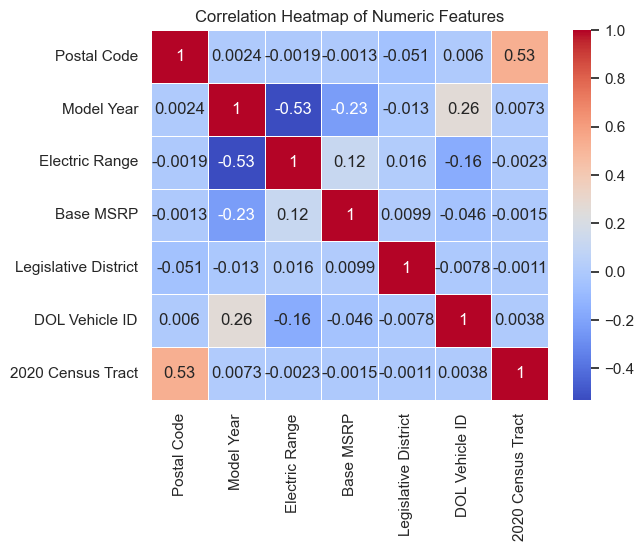

In [41]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')

# Objective 2
## Distribution by Electric Vehicle Type

Text(0.5, 1.0, 'Base MSRP by EV Type')

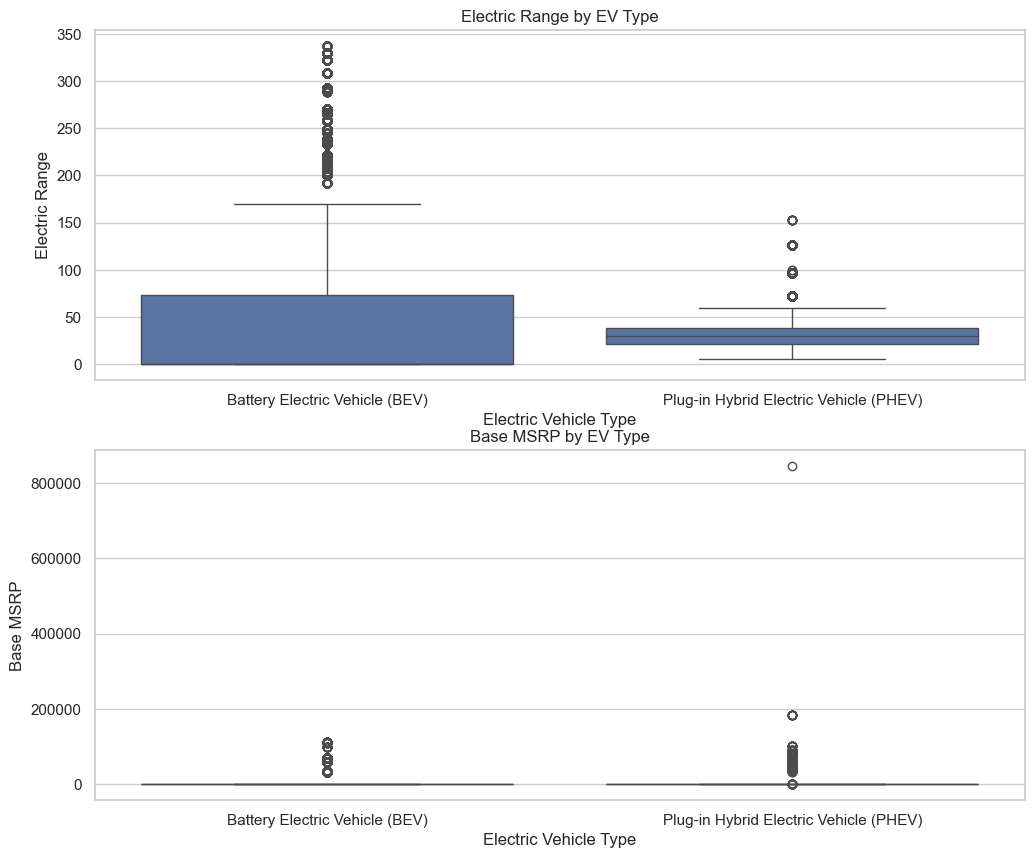

In [52]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df)
plt.title('Electric Range by EV Type')
# plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=df)
plt.title('Base MSRP by EV Type')

# plt.xticks(rotation=45)

# Objective 3
## Perform Z-test on electric range between top EV brands.

In [43]:
from statsmodels.stats.weightstats import ztest

range1 = df[df['Make'] == 'TESLA']['Electric Range'].dropna()
range2 = df[df['Make'] == 'NISSAN']['Electric Range'].dropna()

z_stat, p_val = ztest(range2, range1)
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("✅ There is a statistically significant difference in the average Electric Range between Tesla and Nissan vehicles.")
else:
    print("⚠️ There is no statistically significant difference in the average Electric Range between Tesla and Nissan vehicles.")

Z-statistic: 11.176
P-value: 0.0000
✅ There is a statistically significant difference in the average Electric Range between Tesla and Nissan vehicles.


# Objective 4
## Trend Over Model Years

Text(0, 0.5, 'Number of Registrations')

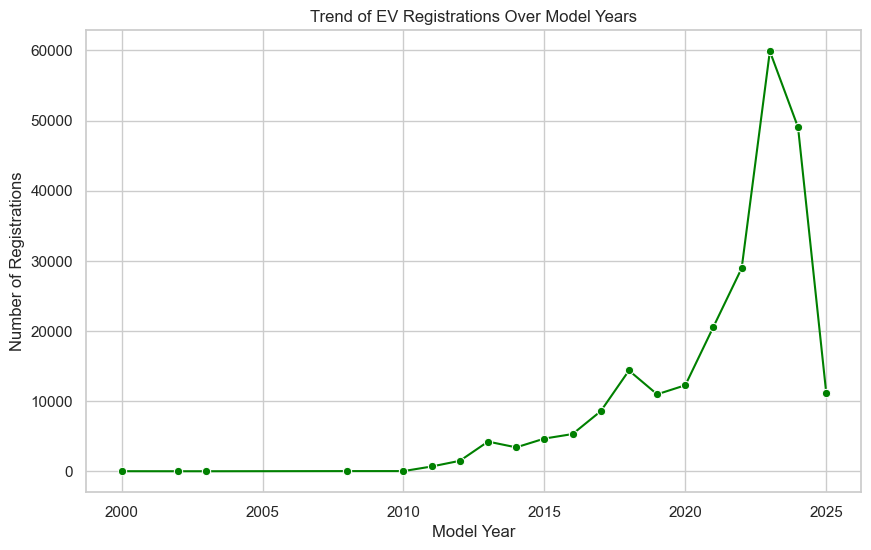

In [44]:
ev_trend = df['Model Year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(x=ev_trend.index, y=ev_trend.values, marker='o', color='green')
plt.title('Trend of EV Registrations Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Number of Registrations')

# Objective 5
## Distribution Across Electric Utility Providers

Text(0, 0.5, 'Electric Utility Provider')

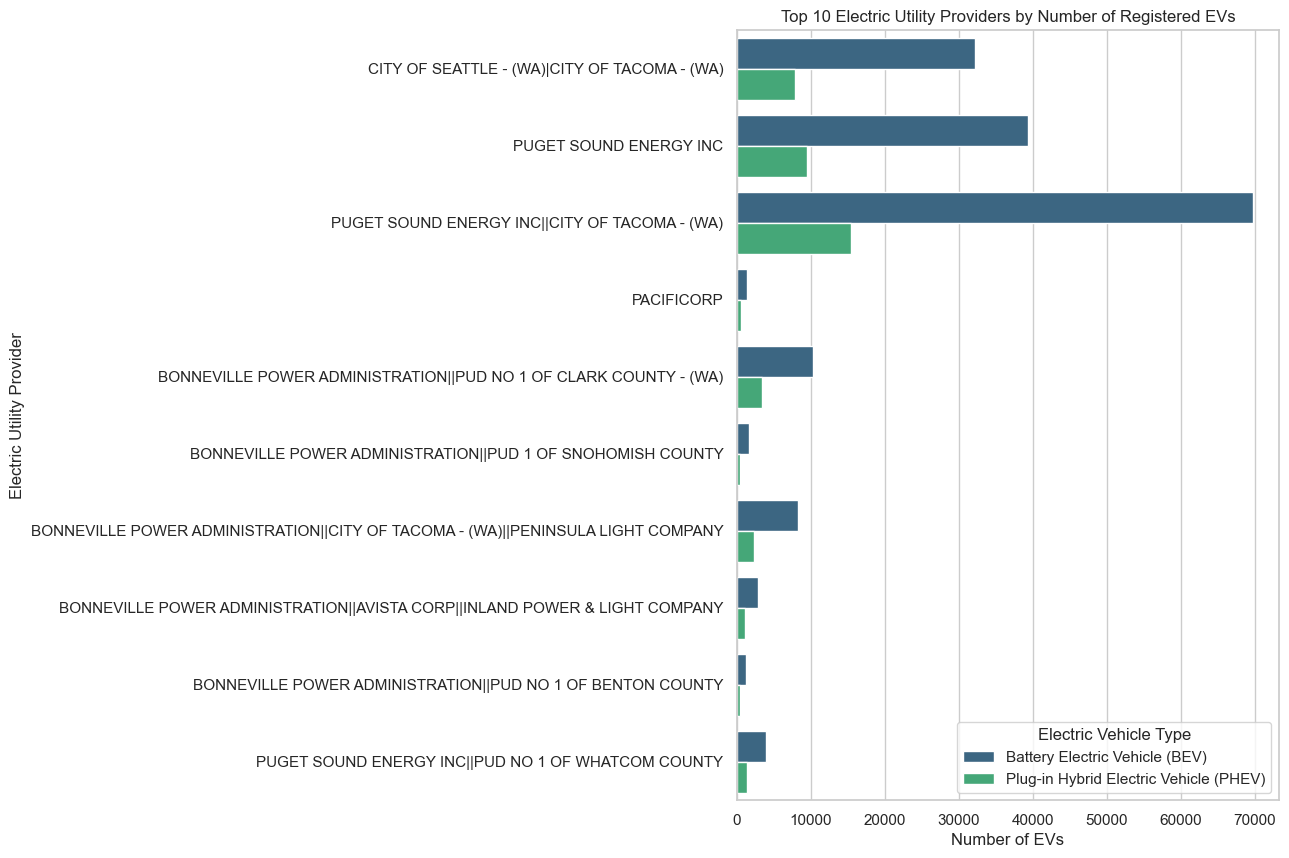

In [45]:
top_utilities = df['Electric Utility'].value_counts().head(10).index
filtered_df = df[df['Electric Utility'].isin(top_utilities)]

# Plot
plt.figure(figsize=(7,10))
sns.countplot(data=filtered_df, y='Electric Utility', hue='Electric Vehicle Type',palette='viridis')

# Labels and Title
plt.title('Top 10 Electric Utility Providers by Number of Registered EVs')
plt.xlabel('Number of EVs')
plt.ylabel('Electric Utility Provider')